In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd


# Nasa News Website

In [2]:
r = requests.get('https://mars.nasa.gov/news/?page=0&per_page=40&order=publish_date+desc%2Ccreated_at+desc&search=&category=19%2C165%2C184%2C204&blank_scope=Latest')

In [3]:
# print the first 500 characters of the HTML
print(r.text[0:500])

<!DOCTYPE html>
<html lang='en' xml:lang='en' xmlns='http://www.w3.org/1999/xhtml'>
<head>
<meta content='text/html; charset=utf-8' http-equiv='Content-Type'>
<!-- Always force latest IE rendering engine or request Chrome Frame -->
<meta content='IE=edge,chrome=1' http-equiv='X-UA-Compatible'>
<script type="text/javascript">window.NREUM||(NREUM={});NREUM.info={"beacon":"bam.nr-data.net","errorBeacon":"bam.nr-data.net","licenseKey":"5e33925808","applicationID":"59562082","transactionName":"JVcPR0


In [5]:
soup = BeautifulSoup(r.text, 'html.parser')


In [6]:
result1 = soup.find_all('div', attrs={'class':'content_title'})

In [8]:
news_title = result1[0].a.text
news_title

"\nNASA's Curiosity Mars Rover Finds a Clay Cache\n"

In [9]:
result2 = soup.find_all('div', attrs={'class':'rollover_description_inner'})

In [10]:
result2

[<div class="rollover_description_inner">
 The rover recently drilled two samples, and both showed the highest levels of clay ever found during the mission.
 </div>, <div class="rollover_description_inner">
 For the first time, NASA's Mars Odyssey orbiter has caught the Martian moon Phobos during a full moon phase. Each color in this new image represents a temperature range detected by Odyssey's infrared camera.
 </div>, <div class="rollover_description_inner">
 Nominees include four JPL projects: the solar system and climate websites, InSight social media, and a 360-degree Earth video. Public voting closes April 18, 2019.
 </div>, <div class="rollover_description_inner">
 NASA's Opportunity Mars rover mission is complete after 15 years on Mars. Opportunity's record-breaking exploration laid the groundwork for future missions to the Red Planet.
 </div>, <div class="rollover_description_inner">
 In deploying its first instrument onto the surface of Mars, the lander completes a major mis

In [11]:
news_p = result2[0].text
news_p

'\nThe rover recently drilled two samples, and both showed the highest levels of clay ever found during the mission.\n'

# Nasa .gov Site

In [12]:
short_url = "https://www.jpl.nasa.gov/"
url = "https://www.jpl.nasa.gov/spaceimages/?search=&category=Mars"
r2 = requests.get(url)

In [13]:
soup2 = BeautifulSoup(r2.text, 'html.parser')

In [14]:
result3 = soup2.find_all('article', attrs={'class':'carousel_item'})

In [15]:
split1 = result3[0]["style"].split("(")

In [16]:
short_url_2 = split1[1].split("'")[1]

In [17]:
short_url_2

'/spaceimages/images/wallpaper/PIA16227-1920x1200.jpg'

In [18]:
featured_image_url = short_url + short_url_2

In [19]:
featured_image_url

'https://www.jpl.nasa.gov//spaceimages/images/wallpaper/PIA16227-1920x1200.jpg'

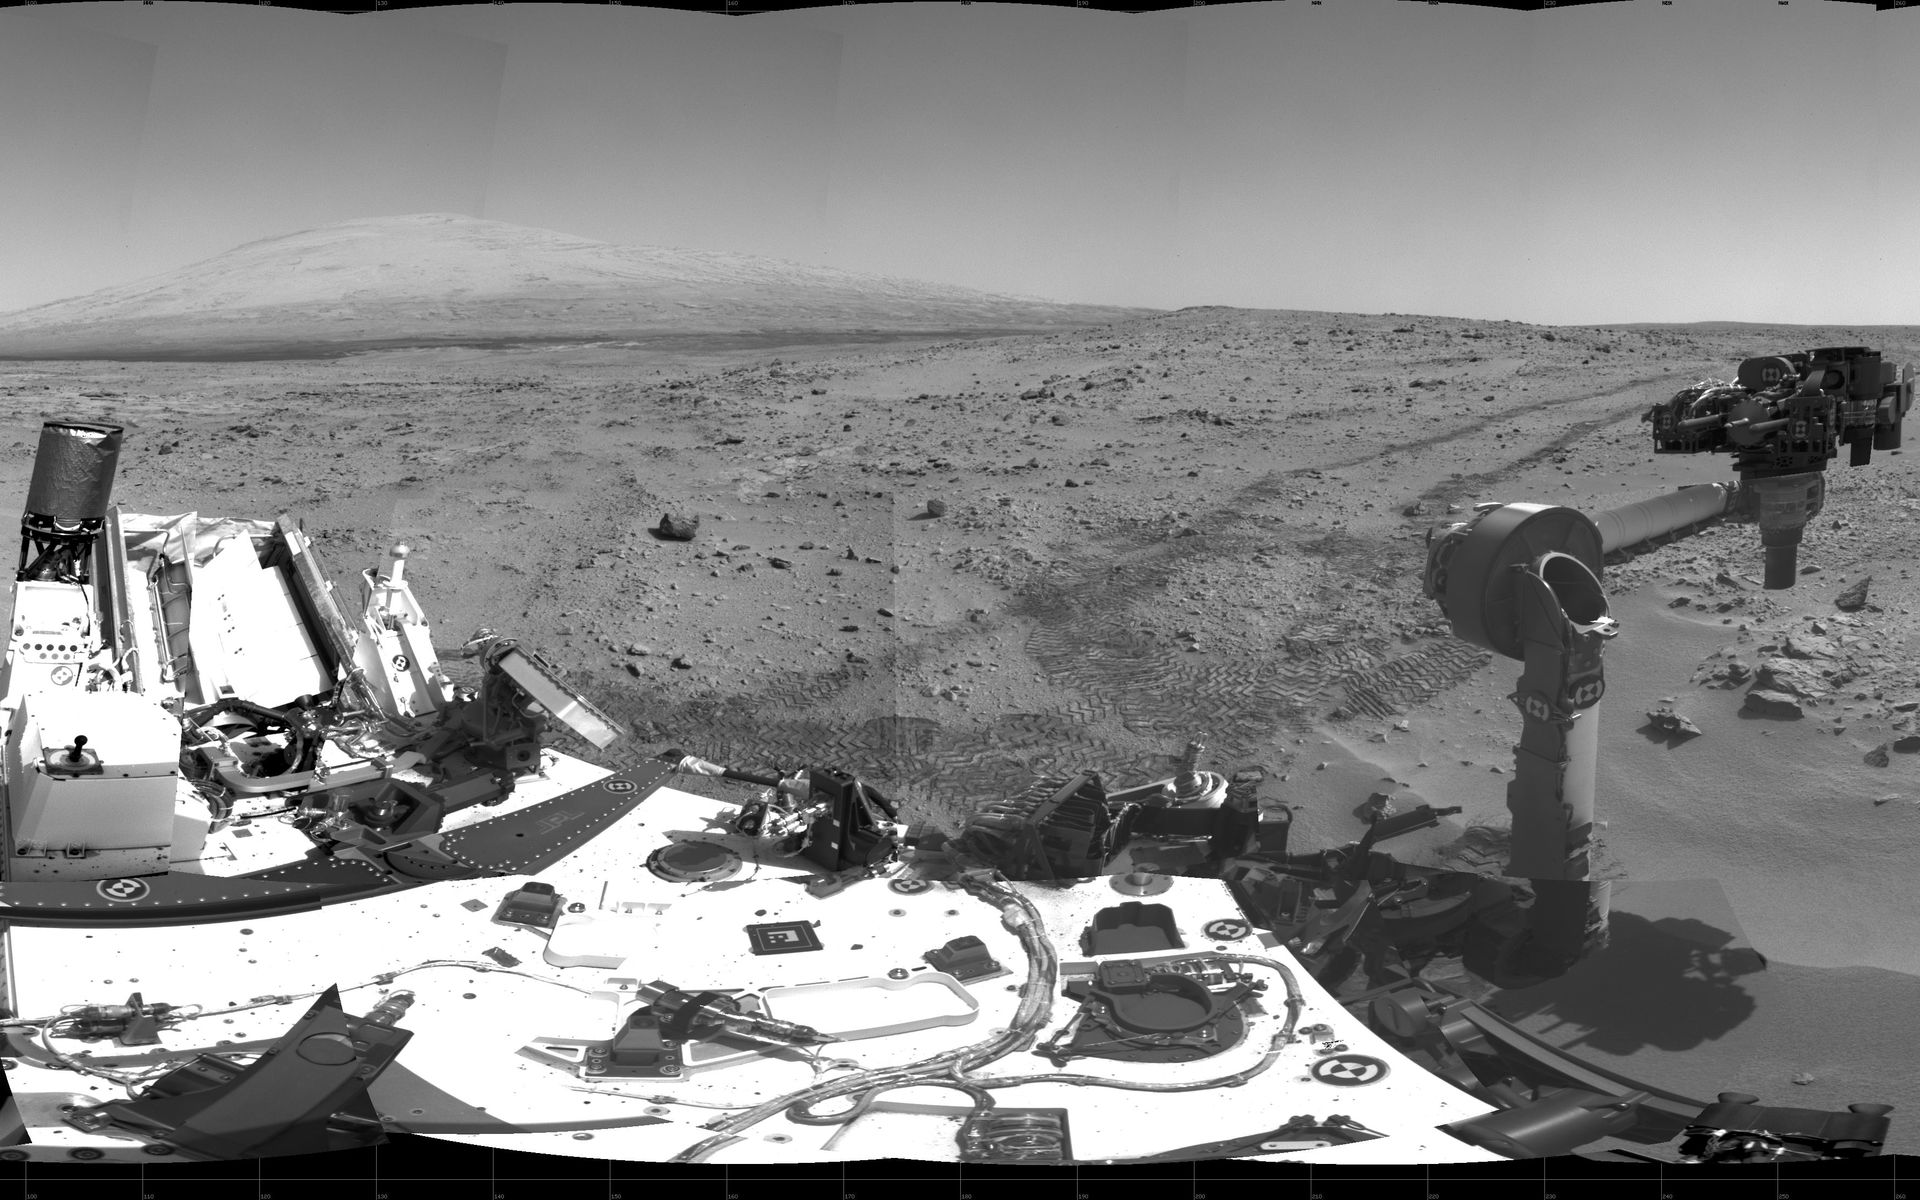

In [20]:
from IPython.display import Image
Image(featured_image_url)

#  Nasa Twitter Weather


In [22]:
url_tw = "https://twitter.com/marswxreport?lang=en"
r3 = requests.get(url_tw)
soup3 = BeautifulSoup(r3.text, 'html.parser')


In [23]:
result4 = soup3.find_all('div', attrs={'class':'js-tweet-text-container'})
result4[0].p.text.split("pic")[0]

'InSight sol 249 (2019-08-09) low -98.8ºC (-145.8ºF) high -26.0ºC (-14.8ºF)\nwinds from the SSE at 4.4 m/s (9.8 mph) gusting to 17.5 m/s (39.1 mph)\npressure at 7.60 hPa'

In [24]:
mars_weather = result4[0].p.text.split("pic")[0]
mars_weather

'InSight sol 249 (2019-08-09) low -98.8ºC (-145.8ºF) high -26.0ºC (-14.8ºF)\nwinds from the SSE at 4.4 m/s (9.8 mph) gusting to 17.5 m/s (39.1 mph)\npressure at 7.60 hPa'

# Mars Facts

In [26]:
fact_url = "https://space-facts.com/mars/"
r4 = requests.get(fact_url)
soup4 = BeautifulSoup(r4.text, 'html.parser')


In [27]:
result5 = soup4.find_all(attrs={'class':'column-2'})
result6 = soup4.find_all(attrs={'class':'column-1'})


In [28]:
data_list1 = []
data_list2 = []
for x in list(range(7,16)):
    data_list1.append(result5[x].text)
    data_list2.append(result6[x].text)
    
df1 = pd.DataFrame({"Value":data_list1},index=data_list2)


In [29]:
df1.to_html('mars_weather.html')


# Mars Image

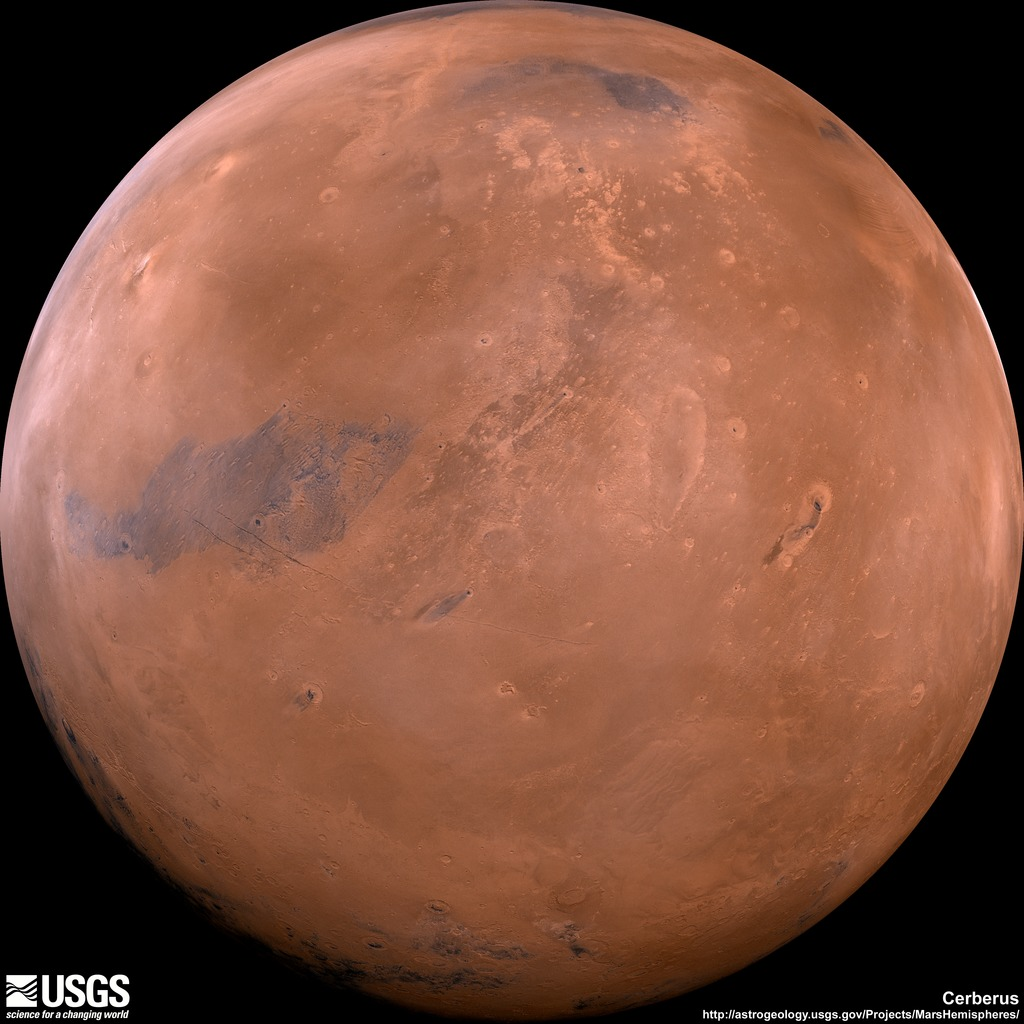

In [30]:
img_url1 = "https://astrogeology.usgs.gov/cache/images/cfa62af2557222a02478f1fcd781d445_cerberus_enhanced.tif_full.jpg"
Image(img_url1)

In [31]:
title1 = "Cerberus Hemisphere"

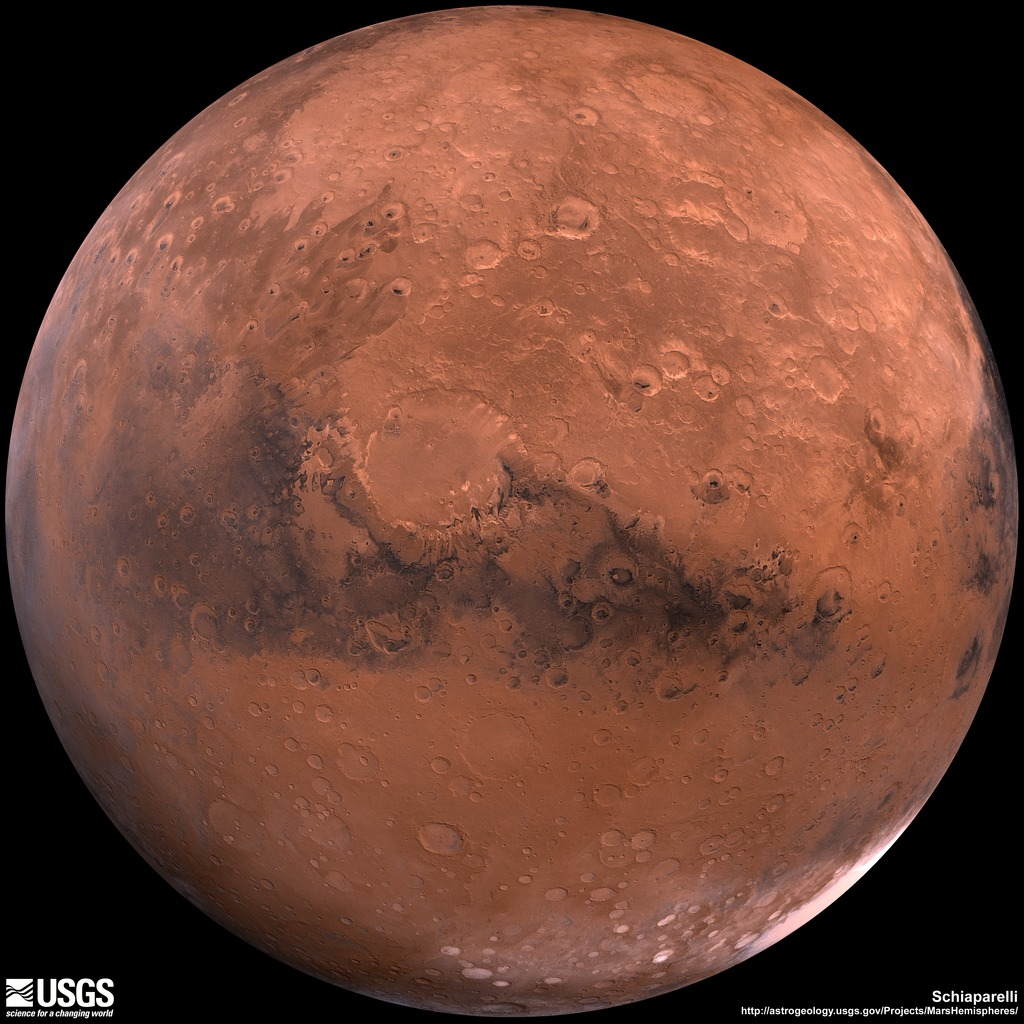

In [32]:
img_url2 = "https://astrogeology.usgs.gov/cache/images/3cdd1cbf5e0813bba925c9030d13b62e_schiaparelli_enhanced.tif_full.jpg"
Image(img_url2)

In [33]:
title2 = "Schiaparelli Hemisphere"

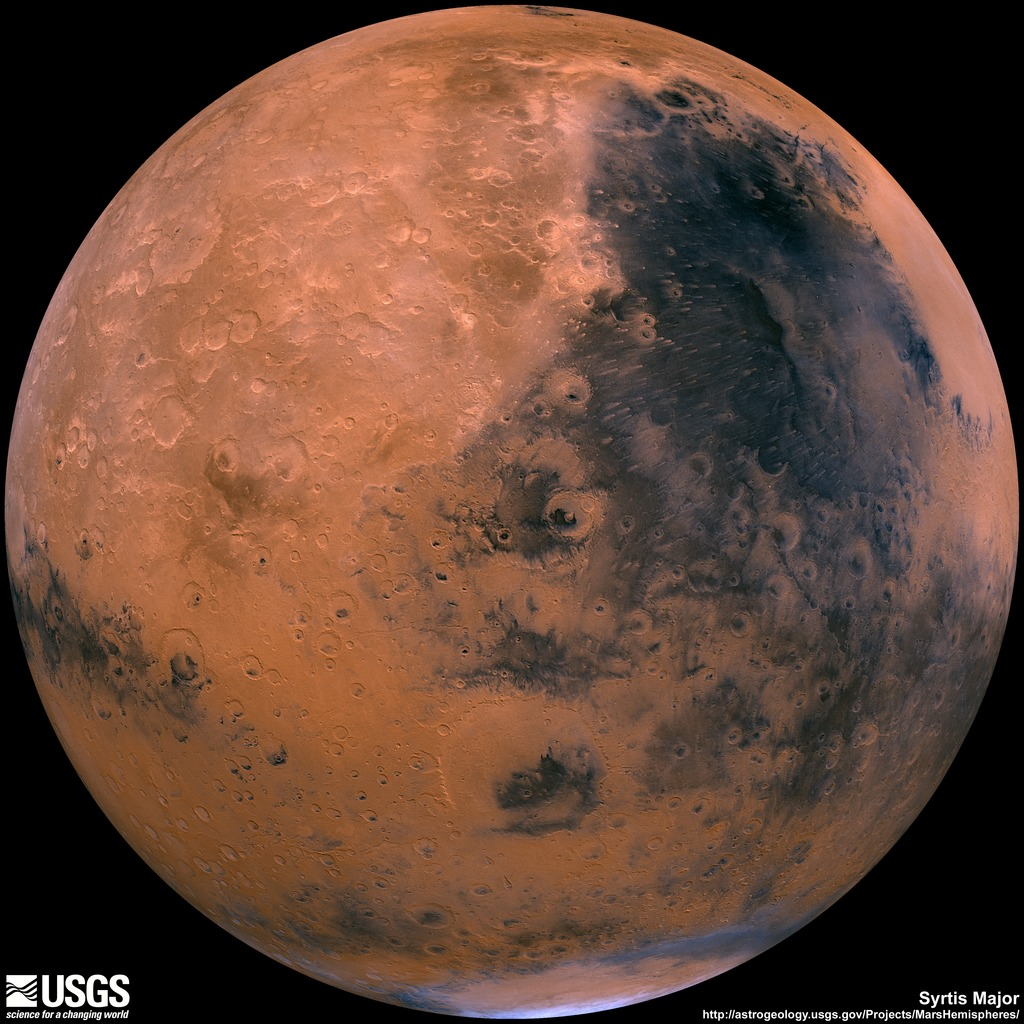

In [34]:
img_url3 = "https://astrogeology.usgs.gov/cache/images/ae209b4e408bb6c3e67b6af38168cf28_syrtis_major_enhanced.tif_full.jpg"
Image(img_url3)

In [35]:
title3 = "Syrtis Major Hemisphere"

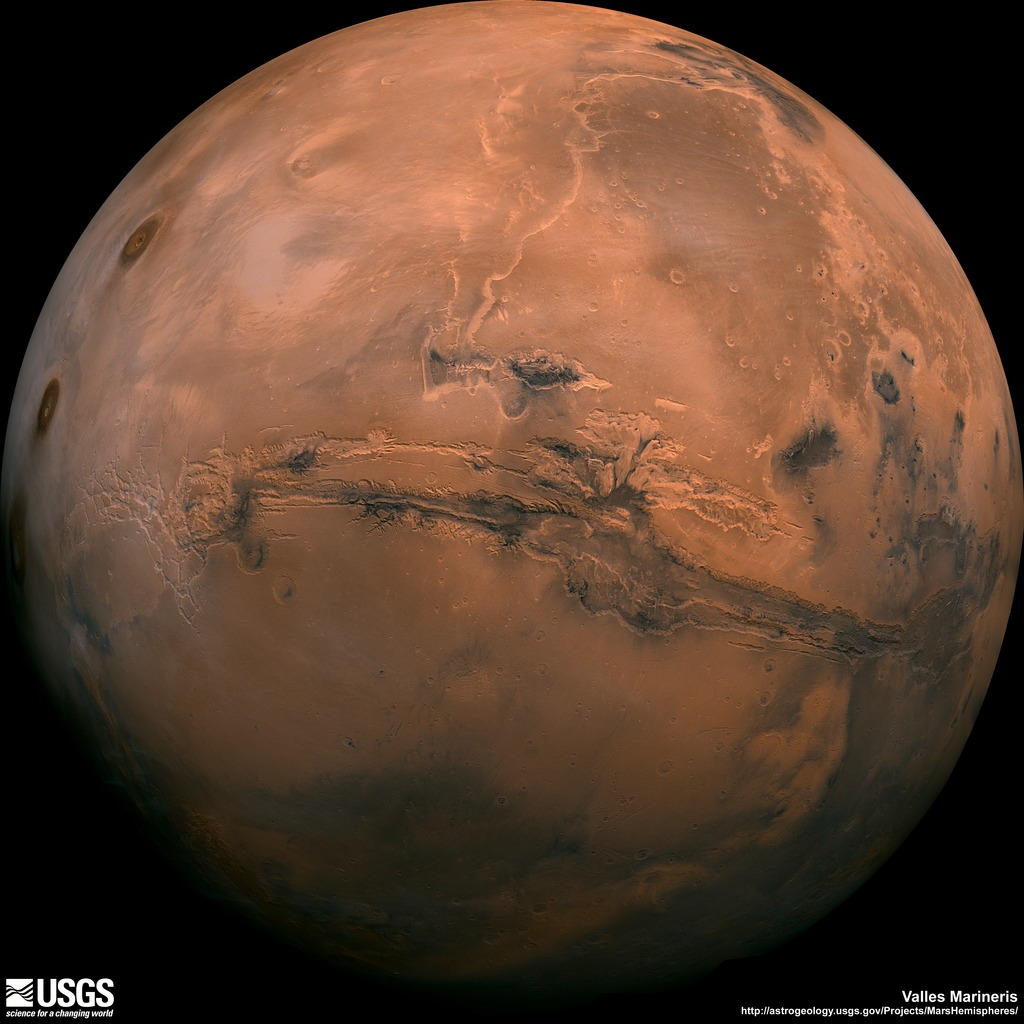

In [36]:
img_url4 = "https://astrogeology.usgs.gov/cache/images/7cf2da4bf549ed01c17f206327be4db7_valles_marineris_enhanced.tif_full.jpg"
Image(img_url4)

In [37]:
title4 = "Valles Marineris Hemisphere"

In [38]:
hemisphere_image_urls = [
    {"title": title1, "img_url":img_url1},
    {"title": title2, "img_url": img_url2},
    {"title": title3, "img_url": img_url3},
    {"title": title4, "img_url": img_url4},
]

In [39]:
df1

,Value
Equatorial Diameter:,"6,792 km"
Polar Diameter:,"6,752 km"
Mass:,6.39 × 10^23 kg (0.11 Earths)
Moons:,2 (Phobos & Deimos)
Orbit Distance:,"227,943,824 km (1.38 AU)"
Orbit Period:,687 days (1.9 years)
Surface Temperature:,-87 to -5 °C
First Record:,2nd millennium BC
Recorded By:,Egyptian astronomers


In [40]:
df1.index[0]

'Equatorial Diameter:'

In [41]:
df1.Value[0]

'6,792 km'